# Examen parcial 3 (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 30.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [14]:
import pandas as pd
import numpy as np
import scipy
import scipy.integrate as integrate
from matplotlib import pyplot as plt

# Ejercicio 1

El archivo data_radius_density.csv contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="https://github.com/mhemmg/ComputationalNumericalMethods/blob/master/extras/21_Examen_Parcial_03/disk_radius_density.png?raw=1" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* Pista:`x`: is radius and `y`: is ***integrand***


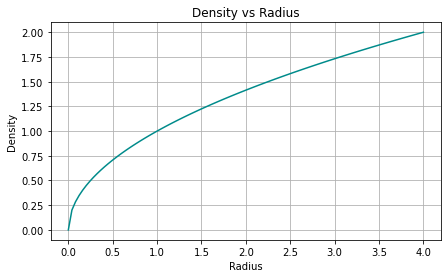

In [37]:
#a)
#read dataframe
df = pd.read_csv('data_radius_density.csv')
df.head()

#plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df['radius'], df['density'], color='darkcyan')
ax.set_title('Density vs Radius')
ax.set_ylabel('Density')
ax.set_xlabel('Radius')
ax.grid()

In [88]:
#b)
#integral
r = df['radius']
d = df['density']

I_simps = integrate.simps(2*np.pi*d,r) #method simpson
print(f'La masa del disco: I = {I_simps} kg')

La masa del disco: I = 33.503965286057415 kg


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv data_pressure_vs_temperature.csv.

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimo grafico hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)
* f) hace interpolacion cubica (100 puntos) de los valores de pression $P$, repite puntos `c)` y `d)`

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

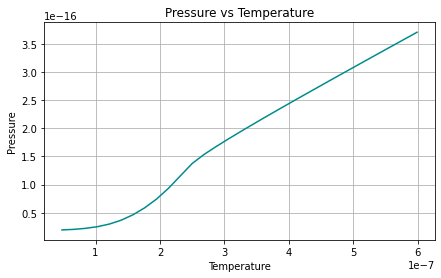

In [36]:
#a)read tge file
df2 = pd.read_csv('data_pressure_vs_temparature.csv')
df2.head()

#b)plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df2['Temperature'], df2['Pressure'], color='darkcyan')
ax.set_title('Pressure vs Temperature')
ax.set_ylabel('Pressure')
ax.set_xlabel('Temperature')
ax.grid()

La capacidad calorifica: C = [5.29799802e-11 7.61486415e-11 1.30352287e-10 2.06082997e-10
 3.12475005e-10 4.48916825e-10 6.02904968e-10 7.63919658e-10
 9.40191259e-10 1.11550372e-09 1.19769793e-09 1.03501324e-09
 8.09658111e-10 7.30340985e-10 7.01723220e-10 6.84061313e-10
 6.71936615e-10 6.63114111e-10 6.56443006e-10 6.51256053e-10
 6.47135543e-10 6.43805355e-10 6.41075324e-10 6.38810197e-10
 6.36911237e-10 6.35304785e-10 6.33934876e-10 6.32758315e-10
 6.31741302e-10 6.30857069e-10 6.30445179e-10]


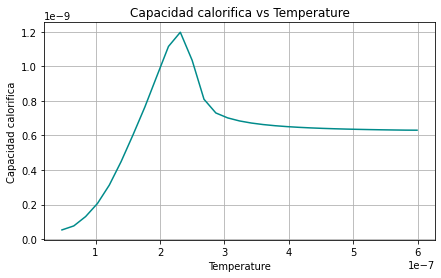

In [43]:
#c)
#Capacidad calorifica
p = df2['Pressure'] #y
T = df2['Temperature'] #x

y_grad = np.gradient(p, T) #capacidad calorifica
print(f'La capacidad calorifica: C = {y_grad}')

#d)
#plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(T,y_grad, color='darkcyan')
ax.set_title('Capacidad calorifica vs Temperature')
ax.set_ylabel('Capacidad calorifica')
ax.set_xlabel('Temperature')
#ax.set_xlim(2,3)
ax.grid()

In [67]:
#determinemos la posicion donde se encuentra el cambio abrupto en la capacidad calorifica
position = 0
for i in y_grad:
    if i!=y_grad.max():
        position += 1
    else:
        break

print(position)
print(f'La temperatura critica del gas: T = {T[10]} K')

10
La temperatura critica del gas: T = 2.3147805092375505e-07 K


# Ejercicio 3

Dada es Matrix $S$:

$$S=
\begin{bmatrix}
1 &  -1 & -1 & -1\\
-1 &  2 & 0 & 0\\
-1 &  3 & 3 & 0 \\
-1 &  0 & 1 & 4 \\
\end{bmatrix}$$


a) calcular $S^5$ utilizando diagonalización.  

b) crear una funcion `matrix_power(A,n)` que recive dos parametros: matrix $A$, y valor entero de la potencia $n$. Funcion tiene que devolver una matrix $M=A^n$ (usa diagonalizacion)

In [73]:
#a)
S = np.array([[1, -1, -1, -1], 
              [-1, 2, 0, 0],
              [-1, 3, 3, 0],
              [-1,0,1,4]])

S_5 = S@S@S@S@S

print('S^5:\n', S_5)


S^5:
 [[  485  -755  -563  -563]
 [ -179   280   192   192]
 [ -675  1201   707   464]
 [-1027  1448  1275  1518]]


In [86]:
#MATRIZ POWER NUMPY
#b)
def my_matrix_power(A,n):
    A_NI = A@A
    for i in range(n):
        #A_2 = A@A

        A_N = A_NI@A
        A_NI = A_N
        #A = A_N

    return A_NI


print(my_matrix_power(S,6))

[[  56097  -87356  -64780  -64780]
 [ -19628   30573   22576   22576]
 [ -65788  106556   73281   66720]
 [-131500  200664  154580  161141]]


In [78]:
power = np.linalg.matrix_power(S, 6)
print(power)

[[ 2366 -3684 -2737 -2737]
 [ -843  1315   947   947]
 [-3047  5198  3260  2531]
 [-5268  7748  6370  7099]]


# Feedback:
```
Exercise 1.
Importation of the data + labeled plot (rho vs. r)	            (max 0.5p):	0.5p
Calculation of the integral                 		              (max 1.5p):	0.5p

Exercise 2.
Importation of the data + labeled plot P vs. T 	               (max 0.5p):	0.5p
Calculation of the derivative and plot Cv vs. T        		   (max 1.0p):	2.0p
Approximation of the critical temperature                         (max 0.5p):	0.5p
Interpolation                                                     (max 1.0p):	0.0p

Exercise 3.
Calculation of the M^n                                 	       (max 2.0p):	0.5p
Function of the M^n                                    	       (max 2.0p):	1.5p

- Total:                                                          (max 10.0p):   6.0p
```